In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models,layers
from keras import applications
import glob2 as glob
from numpy import random

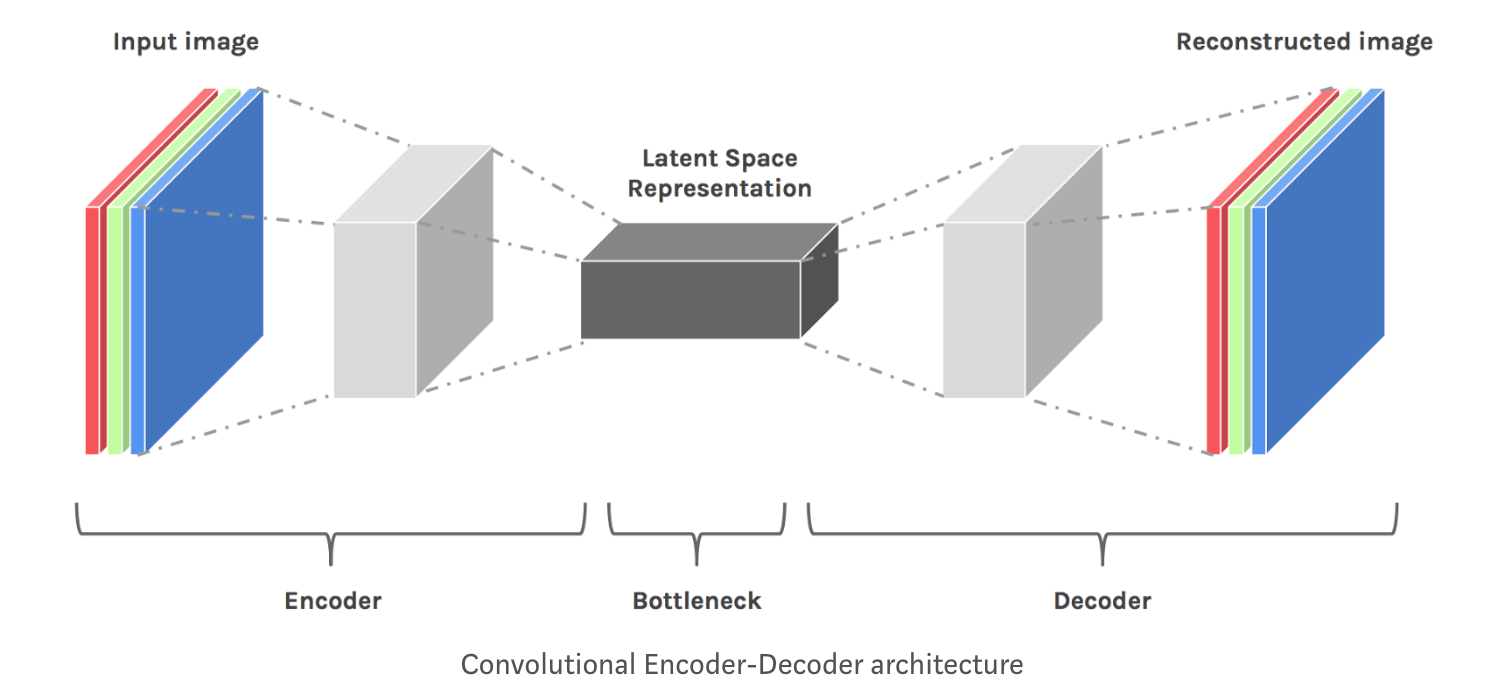

To go deeper with Model CLass and API:
https://keras.io/models/model/
https://keras.io/getting-started/functional-api-guide/

In [10]:
# dimensionality of the latents space 
embedding_dim = 32 

#Input layer
input_img = layers.Input(shape=(784,))  

#Encoding layer
encoded = layers.Dense(embedding_dim, activation='relu')(input_img)

#Decoding layer
decoded = layers.Dense(784,activation='sigmoid')(encoded) 

#Autoencoder --> in this API Model, we define the Input tensor and the output layer
#wraps the 2 layers of Encoder e Decoder
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()

#Encoder
encoder = models.Model(input_img,encoded)
encoder.summary()

#Decoder
encoded_input = layers.Input(shape=(embedding_dim,))
decoder_layers = autoencoder.layers[-1]  #applying the last layer
decoder = models.Model(encoded_input,decoder_layers(encoded_input))

print(input_img)
print(encoded)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
__

In [11]:
autoencoder.compile(
    optimizer='adadelta',  #backpropagation Gradient Descent
    loss='binary_crossentropy'
)

In [16]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()  #underscore for unanimous label that we don't
                                    # want to keep im memory
#Normalization

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape((-1,784))  #to go from (60000,28,28) to new shape and -1 let
                                    #numpy to calculate the number for you
x_test = x_test.reshape((-1,784))

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [19]:
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,
                validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1031 - val_loss: 0.1014
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1028 - val_loss: 0.1011
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.1025 - val_loss: 0.1008
Epoch 4/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1022 - val_loss: 0.1005
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1019 - val_loss: 0.1002
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1016 - val_loss: 0.0999
Epoch 7/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1014 - val_loss: 0.0997
Epoch 8/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1011 - val_loss: 0.0995
Epoch 9/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1009 - val_loss: 0.0993
Epoch

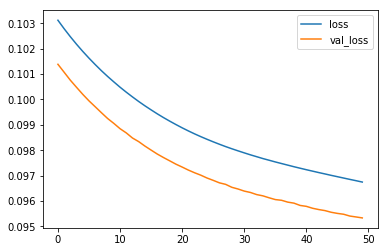

In [20]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

# Validation tell us how good is the model in generalizing

(10000, 32) (10000, 784)


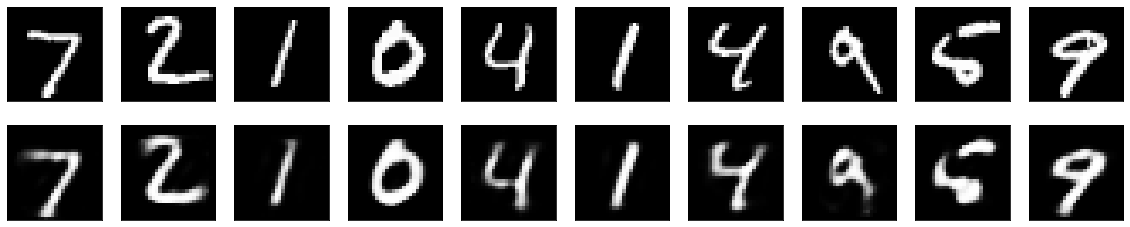

In [21]:
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs)  
print(encoded_imgs.shape,decoded_imgs.shape)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()